<a href="https://colab.research.google.com/github/rafiqmyura/Learn-Machine-Learning/blob/main/Fraud_Detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/content'):
  for  filename in filenames:
    print(os.path.join(dirname, filename))

/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/logs/2024.01.18/14.21.03.392855.log
/content/.config/logs/2024.01.18/14.20.43.075617.log
/content/.config/logs/2024.01.18/14.21.14.838196.log
/content/.config/logs/2024.01.18/14.21.15.646902.log
/content/.config/logs/2024.01.18/14.20.54.540679.log
/content/.config/logs/2024.01.18/14.20.17.088067.log
/content/.config/configurations/config_default
/content/drive/MyDrive/ITcomp.zip
/content/drive/MyDrive/Dokumen tanpa judul.gdoc
/content/drive/MyDrive/CV Rafiq Al HAfizh Adha.pdf
/content/drive/MyDrive/link portofolio.txt
/content/drive/MyDrive/Surat Pernyataan Perubahaan Judul.pdf
/content/drive/MyDrive/Rusume.docx
/content/drive/MyDrive/WhatsApp Image 2023-03-31 at 17.22.38.jpeg
/content/drive/MyDrive/Surat Keterangan Kerja Rafiq

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Data Fastag Fraud/FastagFraudDetection.csv')

In [3]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [6]:
df.shape

(5000, 13)

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [8]:
df.isnull()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
print("Missing values in 'FastagID':", df['FastagID'].isnull().sum())

Missing values in 'FastagID': 549


In [10]:
df = df.dropna(subset=['FastagID'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         4451 non-null   int64         
 1   Timestamp              4451 non-null   datetime64[ns]
 2   Vehicle_Type           4451 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            4451 non-null   object        
 5   Lane_Type              4451 non-null   object        
 6   Vehicle_Dimensions     4451 non-null   object        
 7   Transaction_Amount     4451 non-null   int64         
 8   Amount_paid            4451 non-null   int64         
 9   Geographical_Location  4451 non-null   object        
 10  Vehicle_Speed          4451 non-null   int64         
 11  Vehicle_Plate_Number   4451 non-null   object        
 12  Fraud_indicator        4451 non-null   object        
dtypes: 

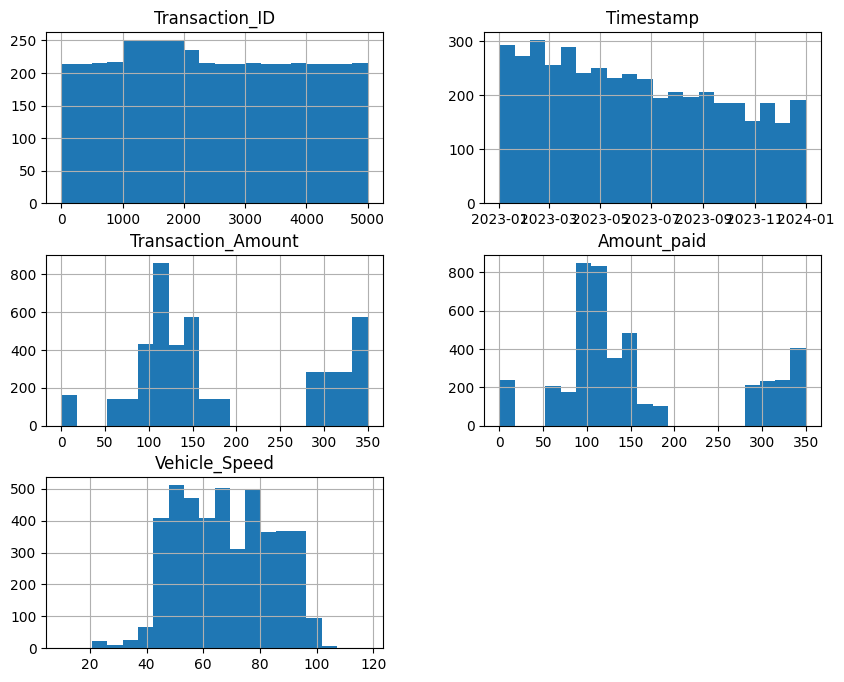

In [12]:
df.hist(figsize=(10, 8), bins=20)
plt.show()

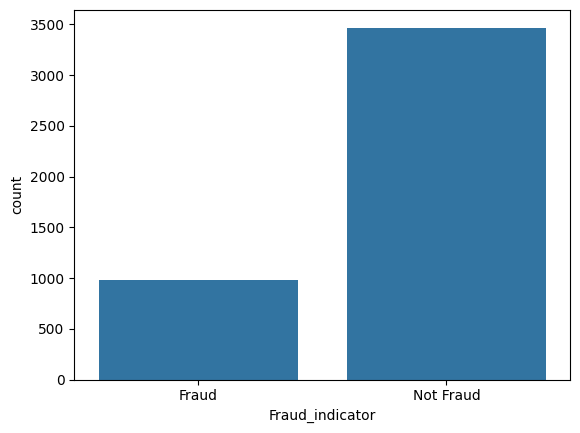

In [13]:
sns.countplot(x='Fraud_indicator', data=df)
plt.show()

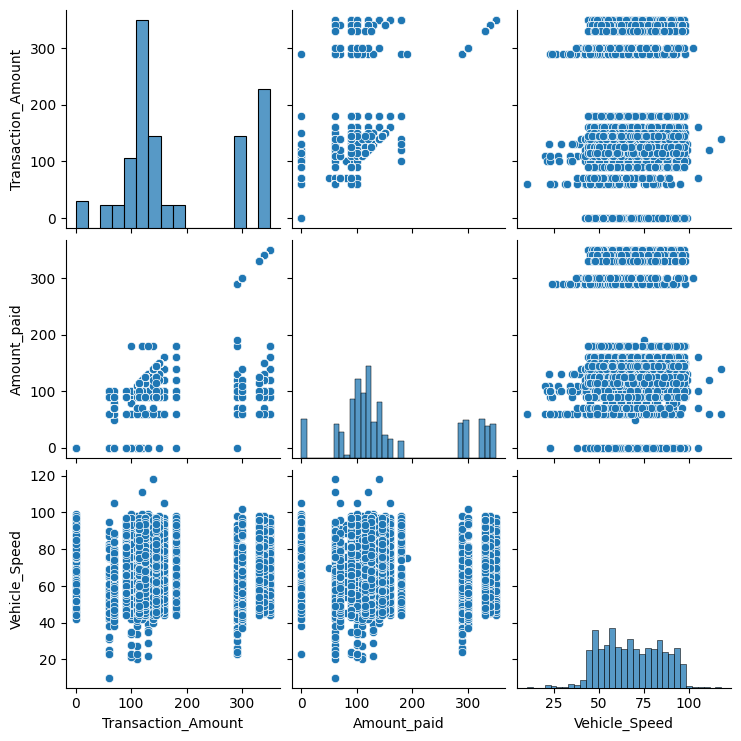

In [14]:
sns.pairplot(df, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

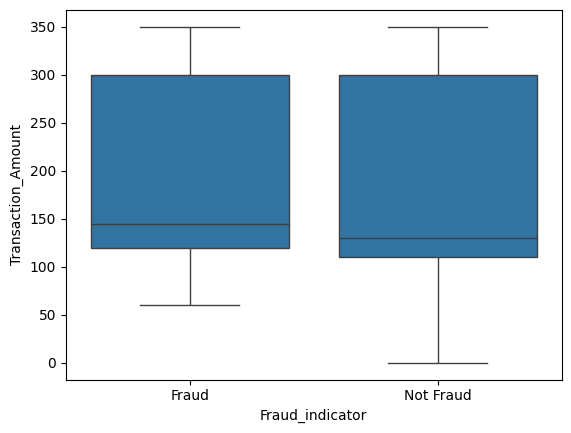

In [15]:
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df)
plt.show()

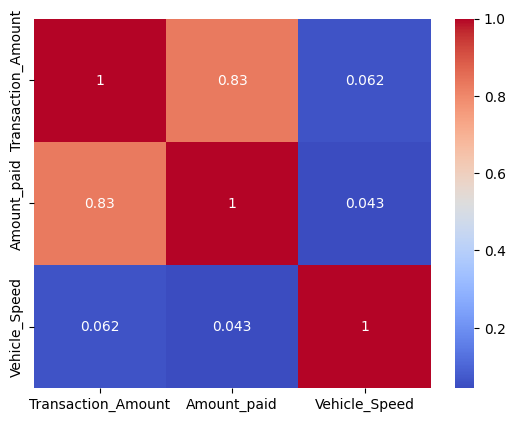

In [16]:
correlation_matrix = df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

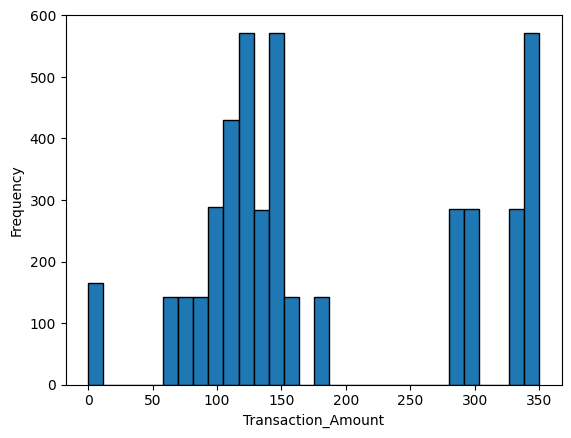

In [17]:
plt.hist(df['Transaction_Amount'], bins=30, edgecolor='black')
plt.xlabel('Transaction_Amount')
plt.ylabel('Frequency')
plt.show()

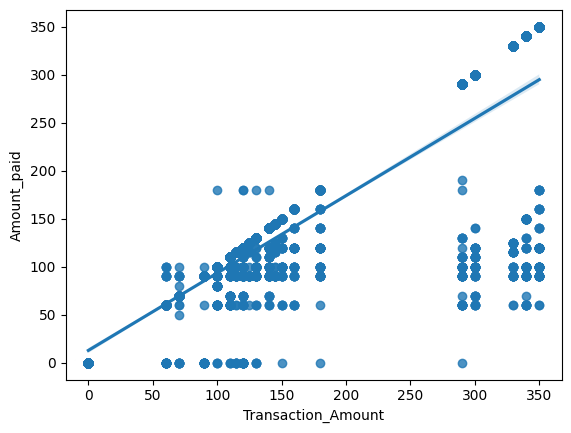

In [18]:
sns.regplot(x='Transaction_Amount', y='Amount_paid', data=df)
plt.show()

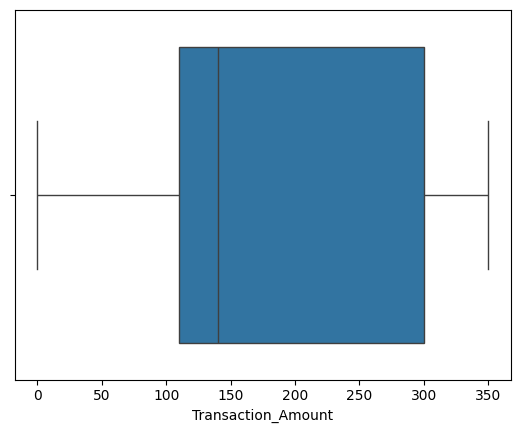

In [20]:
sns.boxplot(x='Transaction_Amount', data=df)
plt.show()